In [ ]:
import numpy as np 
import scipy as sp 
import matplotlib.pyplot as plt
import pandas as pd
from osc_toolkit import oscillation, delayed_oscillation
from models import *

In [6]:
cA2_tol = 14.5
CMC_3a = 1.56
tau = 1.15
df_3a_fig3_NatChem = pd.read_csv(r'Data_sets/3a_fig3e_osc_NatChem_MH.csv')
df_3a_fig3_NatChem['Timea2'] /= tau
df_3a_fig3_NatChem['Times3a'] /= tau
df_3a_fig3_NatChem['s3a'] /= CMC_3a

In [7]:
params = np.array([15, 35.2, 0.65, 18.6])
consts = np.array([0.11, 2])
delay = np.array([0.02, 0.045])
init_cond = [0.9, 0]
delayed_model_fig3 = delayed_oscillation(delayed_approx_model_FTC, delay=delay, params=params, consts=consts, init_cond=init_cond, calc_all=calc_all_delayed_approx_model_FTC)
delayed_model_fig3.add_exp_data(df_3a_fig3_NatChem)

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Initial condition is set as [0.9 0. ]


Generating, compiling, and loading C code.


ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


/Users/zhihengzhang/Documents/01_Research/03_Lab-SPF/Chemical_Oscillation_Model/osc_toolkit.py:223: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])


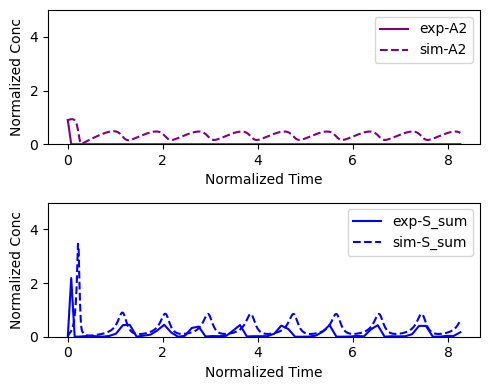

In [8]:
delayed_model_fig3.set_params(np.array([36, 51, 0.55, 20.4]))
fig, axes = delayed_model_fig3.plot(ylim=5, exp=True)

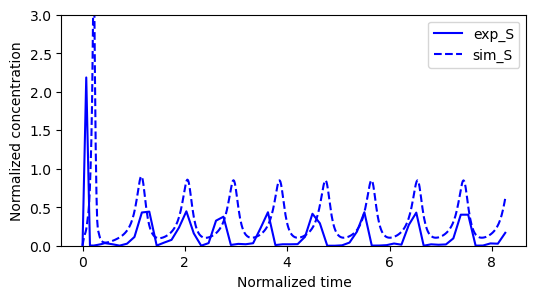

In [9]:
ax1 = axes[1]
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(ax1.lines[0].get_xdata(), ax1.lines[0].get_ydata(), label='exp_S', color='b')
ax.plot(ax1.lines[1].get_xdata(), ax1.lines[1].get_ydata(), label='sim_S', color='b', linestyle='--')
ax.set_xlabel('Normalized time')
ax.set_ylabel('Normalized concentration')
ax.set_ylim(0, 3)
ax.legend()

(-0.05, 2.0)

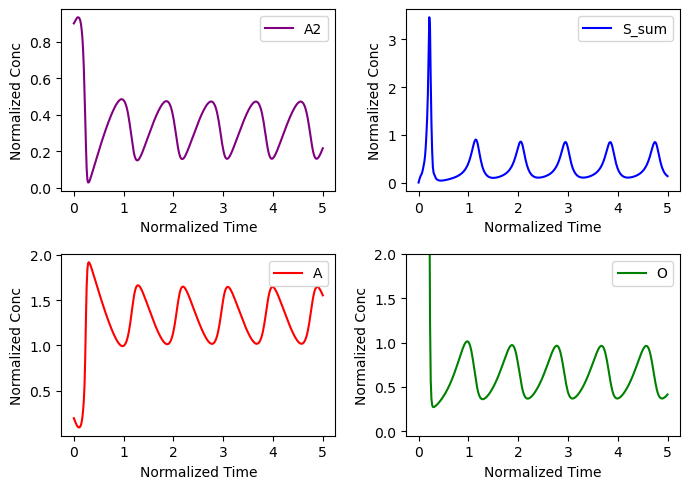

In [11]:
fig, ax = delayed_model_fig3.plot(t=5)
ax[1][1].set_ylim(-0.05, 2)

In [ ]:
delayed_model_fig3.interactive_plot(exp=True, ran=30, ylim=2)

interactive(children=(FloatSlider(value=41.25, description='alpha', max=71.25, min=11.25, step=0.05), FloatSli…

/var/folders/8j/x1ffcm515s74s8v0g59y641r0000gn/T/ipykernel_98429/2933479598.py:36: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])


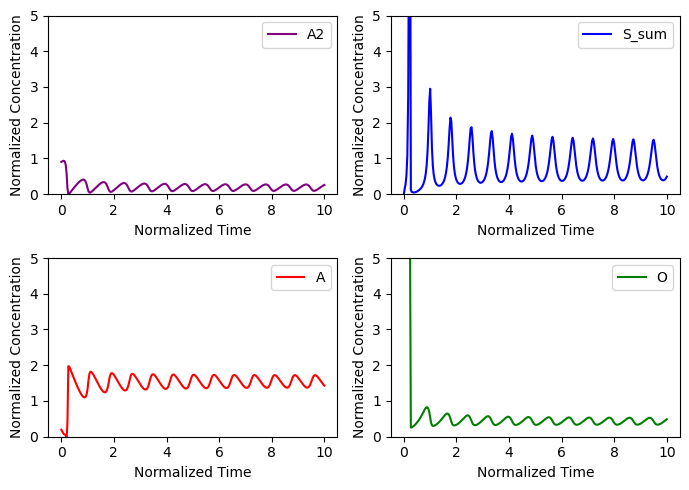

In [ ]:
delayed_model_fig3.set_params(np.array([20, 15, 0.55, 10]))
fig, axes = delayed_model_fig3.plot(ylim=5)

In [ ]:
files = ['Data_sets/1_expB_osc_NatChem_MH.csv',
         'Data_sets/3b_expB_osc_NatChem_MH.csv',
         'Data_sets/4_expB_osc_NatChem_MH.csv']

df_list = [pd.read_csv(file) for file in files]

exp_data = pd.concat(df_list, axis=1)

exp_data.columns = ['t1', 'c1', 't3b', 'c3b', 't4', 'c4']

cut_off, CMC_3b = 112, 0.52
tau = 0.25
C_A2tol = exp_data.loc[0, 'c1'] + exp_data.loc[0, 'c4'] / 2

exp_data = exp_data.head(cut_off)
exp_data[['c1', 'c4']] /= C_A2tol
exp_data['c3b'] /= CMC_3b

for s in ['t1', 't3b', 't4']:
    exp_data = exp_data.drop_duplicates(subset=s)
    exp_data[s] /= tau

df_fig1_MHNatChem = exp_data.clip(lower=0)
df_fig1_MHNatChem.loc[0, 't3b'] = 0
df_fig1_MHNatChem.loc[0, 't4'] = 0

The species are ['A2', 'S_sum', 'A', 'O']. Please check if the data is in the same order and correct format (time, concentration).
Generating, compiling, and loading C code.


ld: warning: duplicate -rpath '/Users/zhihengzhang/anaconda3/lib' ignored


Using default integration parameters.


/var/folders/8j/x1ffcm515s74s8v0g59y641r0000gn/T/ipykernel_98429/2933479598.py:36: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry (though you should think about increasing your sampling time).
  sol = np.array([self.dde.integrate(time) for time in t_eval])


(<Figure size 700x500 with 4 Axes>,
 array([[<Axes: xlabel='Normalized Time', ylabel='Normalized Concentration'>,
         <Axes: xlabel='Normalized Time', ylabel='Normalized Concentration'>],
        [<Axes: xlabel='Normalized Time', ylabel='Normalized Concentration'>,
         <Axes: xlabel='Normalized Time', ylabel='Normalized Concentration'>]],
       dtype=object))

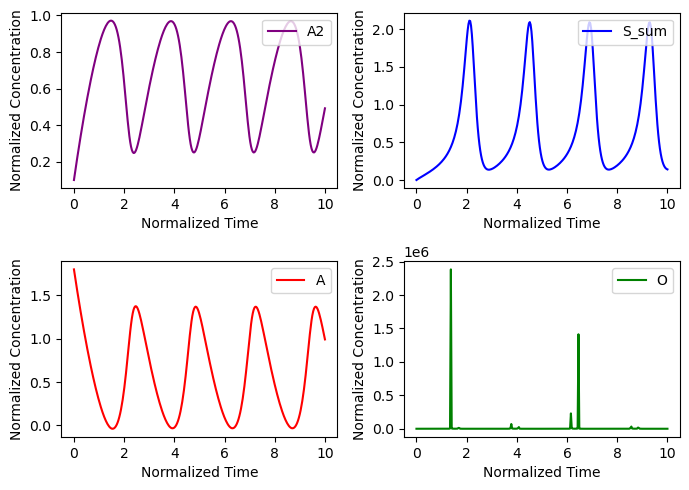

In [ ]:
params = np.array([5.25, 0.2, 0.45, 13.7])
consts = np.array([0.17, 2])
init_cond = [0.1, 0]
delay = np.array([0.05, 0.1])
delayed_model = delayed_oscillation(delayed_approx_model_FTC, delay=delay, params=params, consts=consts, init_cond=init_cond, calc_all=calc_all_delayed_approx_model_FTC)
delayed_model.add_exp_data(df_fig1_MHNatChem)
delayed_model.plot()

In [ ]:
delayed_model.interactive_plot(exp=True, ran=50)

interactive(children=(FloatSlider(value=5.25, description='alpha', max=55.25, step=0.05), FloatSlider(value=0.…